In [1]:
import numpy as np
import os
import time
import multiprocessing
import threading
import matplotlib.pyplot as plt

### Question 1

Generating the array of random numbers

In [2]:
# n = number of elements
n = 6
min = 0
max = 1000

arr = np.random.randint(min, max, (n))

In [3]:
arr

array([144, 494, 213, 896, 552, 479])

#### Making the power set

In [4]:
power_set = []
start = time.time()

x = len(arr)
for i in range(1 << x):
    power_set.append([arr[j] for j in range(x) if (i & (1 << j))])

In [5]:
power_set

[[],
 [144],
 [494],
 [144, 494],
 [213],
 [144, 213],
 [494, 213],
 [144, 494, 213],
 [896],
 [144, 896],
 [494, 896],
 [144, 494, 896],
 [213, 896],
 [144, 213, 896],
 [494, 213, 896],
 [144, 494, 213, 896],
 [552],
 [144, 552],
 [494, 552],
 [144, 494, 552],
 [213, 552],
 [144, 213, 552],
 [494, 213, 552],
 [144, 494, 213, 552],
 [896, 552],
 [144, 896, 552],
 [494, 896, 552],
 [144, 494, 896, 552],
 [213, 896, 552],
 [144, 213, 896, 552],
 [494, 213, 896, 552],
 [144, 494, 213, 896, 552],
 [479],
 [144, 479],
 [494, 479],
 [144, 494, 479],
 [213, 479],
 [144, 213, 479],
 [494, 213, 479],
 [144, 494, 213, 479],
 [896, 479],
 [144, 896, 479],
 [494, 896, 479],
 [144, 494, 896, 479],
 [213, 896, 479],
 [144, 213, 896, 479],
 [494, 213, 896, 479],
 [144, 494, 213, 896, 479],
 [552, 479],
 [144, 552, 479],
 [494, 552, 479],
 [144, 494, 552, 479],
 [213, 552, 479],
 [144, 213, 552, 479],
 [494, 213, 552, 479],
 [144, 494, 213, 552, 479],
 [896, 552, 479],
 [144, 896, 552, 479],
 [494, 89

#### Prime Numbers function

In [6]:
def prime(n):
    flag = True
    for i in range(2,n//2):
        if(n%i==0):
            flag = False
            break
    
    if(flag):
        return n
    else:
        return 0

In [7]:
# Checking the elements that are prime in the power set
prime_subsets = []

for i in range(len(power_set)):
    if(prime(sum(power_set[i])) == 0):
        continue
        
    else:
        prime_subsets.append(power_set[i])
        
end = time.time()

In [8]:
time_serial = end-start
print("Time: ", time_serial)

Time:  0.050863027572631836


In [9]:
prime_subsets

[[213, 896],
 [144, 494, 213, 896],
 [494, 213, 552],
 [479],
 [144, 494, 479],
 [552, 479],
 [144, 494, 552, 479]]

#### Multithreading

In [10]:
# Checking the number of threads available
multiprocessing.cpu_count()

12

In [11]:
prime_subsets = []

def task(min, max, arr):
    global prime_subsets
    print(min, max)
    for i in range(min, max+1):
        if(prime(sum(power_set[i])) == 0):
            continue

        else:
            prime_subsets.append(power_set[i])
            
    return prime_subsets

In [12]:
num_of_threads = 2
thread_handle = []

In [13]:
start = time.time()

for i in range(0,num_of_threads):
    t = threading.Thread(target=task, args=(len(power_set)//num_of_threads * i, len(power_set)//num_of_threads * (i+1), prime_subsets))
    thread_handle.append(t)
    t.start() 
                                
for i in range(0,num_of_threads):
    thread_handle[i].join()    
    
end = time.time()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "F:\Anaconda\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "F:\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-11-1423905602ae>", line 7, in task
IndexError: list index out of range


0 32
32 64


In [14]:
time_multithreading = end-start
print("Time: ", time_multithreading)

Time:  0.011968374252319336


In [15]:
prime_subsets

[[213, 896],
 [144, 494, 213, 896],
 [494, 213, 552],
 [479],
 [479],
 [144, 494, 479],
 [552, 479],
 [144, 494, 552, 479]]

<BarContainer object of 2 artists>

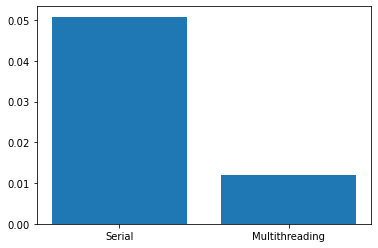

In [16]:
plt.bar(['Serial', 'Multithreading'], [time_serial, time_multithreading])

#### Multiprocessing

In [17]:
def task(arr):
    final_arr = []
    for i in arr:
        if(prime(sum(i))==0):
            continue
        else:
            final_arr.append(i)
            
    return final_arr

In [18]:
pass_arr = []

In [19]:
begin = 0
ending = len(power_set)//4

for i in range(0, num_of_threads):
    pass_arr.append(power_set[begin:begin+ending])
    begin += ending

In [ ]:
pool = multiprocessing.Pool(processes=4)
result = pool.map(task, pass_arr)